  #     project on webscrapping of data of mobiles in flipkart 

Here we imported some useful libraries like beautiful soup ,requests.... used for scraping of data. By using this we can take our data 


In [1]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd

Here I taken my data from flipkart about mobiles.
From that I requested URL for mobiles using requests library and then using BeautifulSoup I have gathered all the data of mobiles in flipkart including HTML tags 
Now I divided the class as mobilename,features,price,rating,actualprice,discount and extracted the respective codes present in HTML tags for getting the data respectively 



In [2]:
flipkart_div_classes = {"mobilename":'_4rR01T', "features":"rgWa7D", "price":"_30jeq3", "rating":'_3LWZlK',"actualprice":"_3I9_wc _27UcVY","discount":"_3Ay6Sb"}
flipkart_search_entry_class = "_2kHMtA"
baseurl = 'https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY'

We imported an another useful library called numpy as np 
Here I have taken an empty lists for all classes have I have taken and using for loop I have extracted the data of 20 pages 
And that all data was appended to that empty lists that I have taken 

In [3]:
import numpy as np

all_mobile_name = []
all_mobile_price = []
all_mobile_rating = []
all_mobile_features = []
all_mobile_actualprice = []
all_mobile_discount = []

for pageno in range(20):
    URL = baseurl + '&page='+str(pageno)
    page = requests.get(URL)
    soup = BeautifulSoup(page.text)
    
    for x in soup.find_all('div', attrs={'class':flipkart_search_entry_class}):
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['mobilename']})
            all_mobile_name.append(res.text)
        except AttributeError:
            all_mobile_name.append(np.NaN)
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['price']})
            all_mobile_price.append(res.text)
        except AttributeError:
            all_mobile_price.append(" ")
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['discount']})
            all_mobile_discount.append(res.text)
        except AttributeError:
            all_mobile_discount.append(np.NaN)
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['actualprice']})
            all_mobile_actualprice.append(res.text)
        except AttributeError:
            all_mobile_actualprice.append(np.NaN)
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['rating']})
            all_mobile_rating.append(res.text)
        except AttributeError:
            all_mobile_rating.append(np.NaN)
        try:
            res = x.find_all('li', attrs = {'class':flipkart_div_classes['features']})
            all_mobile_features.append("\n".join([feature.text for feature in res]))
        except AttributeError:
            all_mobile_features.append(np.NaN)
        
    print ("Processing Page: "+str(pageno))

Processing Page: 0
Processing Page: 1
Processing Page: 2
Processing Page: 3
Processing Page: 4
Processing Page: 5
Processing Page: 6
Processing Page: 7
Processing Page: 8
Processing Page: 9
Processing Page: 10
Processing Page: 11
Processing Page: 12
Processing Page: 13
Processing Page: 14
Processing Page: 15
Processing Page: 16
Processing Page: 17
Processing Page: 18
Processing Page: 19


Above we have seen that all 20 pages data have been processed 
Now we want to create a table for that data for clear visualizations and for clear understanding 
we can create a table by using DataFrame that DataFrame is in pandas library and I have imported pandas library as pd 
Now I created DataFrame called df for that respective appended empty classes 

In [4]:
import pandas as pd
df=pd.DataFrame({"productname":all_mobile_name,
                 "price":all_mobile_price,
                 "ratings":all_mobile_rating,
                 "features":all_mobile_features,
                 "actualprice":all_mobile_actualprice,
                 "discount":all_mobile_discount
                 })

I have created a DataFrame as df 


In [5]:
df

,productname,price,ratings,features,actualprice,discount
0,"Infinix Hot 10 Play (7° Purple, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off
1,"REDMI 9 Power (Mighty Black, 64 GB)","₹9,999",4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,"₹13,999",28% off
2,"Infinix Hot 10 Play (Aegean Blue, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off
3,"Infinix Hot 10 Play (Morandi Green, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off
4,"REDMI 9 Power (Electric Green, 64 GB)","₹9,999",4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,"₹13,999",28% off
...,...,...,...,...,...,...
475,"realme 7 Pro (Mirror Blue, 128 GB)","₹21,999",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,"₹22,999",4% off
476,"SAMSUNG Galaxy F62 (Laser Green, 128 GB)","₹25,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB\n...,"₹31,999",18% off
477,"realme Narzo 20A (Glory Silver, 64 GB)","₹9,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹11,999",20% off
478,Kechaoda K33,"₹1,020",4,32 MB RAM | 32 MB ROM\n3.56 cm (1.4 inch) Disp...,NaN,NaN


Above created df is added to csv file and named as mobileinformation1.csv

In [6]:
df.to_csv('mobileinformation1.csv')

Now by typing df we can see all div classes with collected data in DataFrame 

In [7]:
df

,productname,price,ratings,features,actualprice,discount
0,"Infinix Hot 10 Play (7° Purple, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off
1,"REDMI 9 Power (Mighty Black, 64 GB)","₹9,999",4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,"₹13,999",28% off
2,"Infinix Hot 10 Play (Aegean Blue, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off
3,"Infinix Hot 10 Play (Morandi Green, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off
4,"REDMI 9 Power (Electric Green, 64 GB)","₹9,999",4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,"₹13,999",28% off
...,...,...,...,...,...,...
475,"realme 7 Pro (Mirror Blue, 128 GB)","₹21,999",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,"₹22,999",4% off
476,"SAMSUNG Galaxy F62 (Laser Green, 128 GB)","₹25,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB\n...,"₹31,999",18% off
477,"realme Narzo 20A (Glory Silver, 64 GB)","₹9,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹11,999",20% off
478,Kechaoda K33,"₹1,020",4,32 MB RAM | 32 MB ROM\n3.56 cm (1.4 inch) Disp...,NaN,NaN


# Cleaning of data

I have cleaned my data using regular expessions 
From features I have taken RAM,ROM,Battery using regular expressions 

In [8]:
def get_processor_name(features):
    try:
        returnable = re.compile(regex).findall(x)[0]
    except:
        returnable = ''
    return returnable
regex = r'[0-9][0-9]?\s+[GM]B+\sRAM'
df['RAM'] = df['features'].apply(lambda x : re.compile(regex).findall(x))
regex=r'[0-9][0-9][0-9]?\s+[GM]B+\sROM'
df['ROM'] = df['features'].apply(lambda x:re.compile(regex).findall(x))
regex=r'[0-9][0-9][0-9][0-9][0-9]?\s+mAh'
df['Battery'] = df['features'].apply(lambda x:re.compile(regex).findall(x))


Here that cleaned data is added to a csv file named as mobile_information.csv

In [9]:
df.to_csv('mobile_information.csv')

Now the df is executed with new csv file 

In [10]:
df

,productname,price,ratings,features,actualprice,discount,RAM,ROM,Battery
0,"Infinix Hot 10 Play (7° Purple, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off,[4 GB RAM],[64 GB ROM],[6000 mAh]
1,"REDMI 9 Power (Mighty Black, 64 GB)","₹9,999",4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,"₹13,999",28% off,[4 GB RAM],[64 GB ROM],[6000 mAh]
2,"Infinix Hot 10 Play (Aegean Blue, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off,[4 GB RAM],[64 GB ROM],[6000 mAh]
3,"Infinix Hot 10 Play (Morandi Green, 64 GB)","₹8,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹10,999",22% off,[4 GB RAM],[64 GB ROM],[6000 mAh]
4,"REDMI 9 Power (Electric Green, 64 GB)","₹9,999",4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,"₹13,999",28% off,[4 GB RAM],[64 GB ROM],[6000 mAh]
...,...,...,...,...,...,...,...,...,...
475,"realme 7 Pro (Mirror Blue, 128 GB)","₹21,999",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,"₹22,999",4% off,[8 GB RAM],[128 GB ROM],[4500 mAh]
476,"SAMSUNG Galaxy F62 (Laser Green, 128 GB)","₹25,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB\n...,"₹31,999",18% off,[8 GB RAM],[128 GB ROM],[7000 mAh]
477,"realme Narzo 20A (Glory Silver, 64 GB)","₹9,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,"₹11,999",20% off,[4 GB RAM],[64 GB ROM],[5000 mAh]
478,Kechaoda K33,"₹1,020",4,32 MB RAM | 32 MB ROM\n3.56 cm (1.4 inch) Disp...,NaN,NaN,[32 MB RAM],[32 MB ROM],[]


Now I have collected the info about the created df 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   productname  480 non-null    object
 1   price        480 non-null    object
 2   ratings      480 non-null    object
 3   features     480 non-null    object
 4   actualprice  386 non-null    object
 5   discount     375 non-null    object
 6   RAM          480 non-null    object
 7   ROM          480 non-null    object
 8   Battery      480 non-null    object
dtypes: object(9)
memory usage: 33.9+ KB


As we seen info that all classes are in object type so I have converted the coloumns of price,actualprice,ratings and discount to float type

In [12]:
df['actualprice'] = df['actualprice'].apply(lambda x :str(x).replace('₹', '').replace(',',''))      
df['actualprice']=df['actualprice'].astype(float)
df['ratings'] = df['ratings'].apply(lambda x :str(x).replace('₹', '').replace(',',''))      
df['ratings']=df['ratings'].astype(float)



In [13]:
df.dtypes

productname     object
price           object
ratings        float64
features        object
actualprice    float64
discount        object
RAM             object
ROM             object
Battery         object
dtype: object

In [14]:
df['price'] = df['price'].apply(lambda x:str(x).replace('₹', '').replace(',',''))
df['price'] = df['price'].astype(float)
df['discount'] = df['discount'].apply(lambda x:str(x).replace('%','').replace(',',''))
df['discount'] = df['discount'].apply(lambda x:str(x).replace('off','').replace(',',''))
df['discount'] = df['discount'].astype(float)


In [15]:
df.dtypes

productname     object
price          float64
ratings        float64
features        object
actualprice    float64
discount       float64
RAM             object
ROM             object
Battery         object
dtype: object

Now here the df is executed by changing the changes that we have done

In [16]:
df['RAM'] = df['RAM'].apply(lambda x:str(x).replace('RAM', '').replace(',',''))
df['ROM'] = df['ROM'].apply(lambda x:str(x).replace('ROM', '').replace(',',''))
df['Battery'] = df['Battery'].apply(lambda x:str(x).replace('mAh', '').replace(',',''))
df


,productname,price,ratings,features,actualprice,discount,RAM,ROM,Battery
0,"Infinix Hot 10 Play (7° Purple, 64 GB)",8499.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,10999.0,22.0,['4 GB '],['64 GB '],['6000 ']
1,"REDMI 9 Power (Mighty Black, 64 GB)",9999.0,4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,13999.0,28.0,['4 GB '],['64 GB '],['6000 ']
2,"Infinix Hot 10 Play (Aegean Blue, 64 GB)",8499.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,10999.0,22.0,['4 GB '],['64 GB '],['6000 ']
3,"Infinix Hot 10 Play (Morandi Green, 64 GB)",8499.0,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,10999.0,22.0,['4 GB '],['64 GB '],['6000 ']
4,"REDMI 9 Power (Electric Green, 64 GB)",9999.0,4.3,4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...,13999.0,28.0,['4 GB '],['64 GB '],['6000 ']
...,...,...,...,...,...,...,...,...,...
475,"realme 7 Pro (Mirror Blue, 128 GB)",21999.0,4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,22999.0,4.0,['8 GB '],['128 GB '],['4500 ']
476,"SAMSUNG Galaxy F62 (Laser Green, 128 GB)",25999.0,4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB\n...,31999.0,18.0,['8 GB '],['128 GB '],['7000 ']
477,"realme Narzo 20A (Glory Silver, 64 GB)",9499.0,4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,11999.0,20.0,['4 GB '],['64 GB '],['5000 ']
478,Kechaoda K33,1020.0,4.0,32 MB RAM | 32 MB ROM\n3.56 cm (1.4 inch) Disp...,NaN,NaN,['32 MB '],['32 MB '],[]


Here I have used a function called describe that gives the mean,std,count,min,max....... of the float type and int type coloumns 

In [17]:
df.describe()

,price,ratings,actualprice,discount
count,480.000000,480.000000,386.000000,375.000000
mean,8884.000000,4.226250,12369.243523,17.317333
std,6656.320951,0.192821,7349.284298,8.203175
min,695.000000,3.400000,725.000000,1.000000
25%,1499.000000,4.100000,8499.000000,12.000000
50%,8999.000000,4.300000,12999.000000,18.000000
75%,12990.000000,4.400000,16499.000000,23.000000
max,51999.000000,4.600000,54900.000000,50.000000


 # Exploratory Data Analysis 
  
  I have imported useful libraries for doing EDA for the above scrapped data about mobiles from flipkart

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# scatterplots -
 It is used to observe and show relationship betweens between 2 numeric variables 

# Histogram -
 It is used to see the frequency distribution of the data set 

# displot -
 It shows a histogram witha line on it.It is an density distribution 
 
# Countplot -
 It is used to show the counts of observations in each categorical bins using bars 

# Boxplot -
 It is the measure of how well distributed the dataina data set.It represents the maximum,minimum,median,first quartlie,second quartile and third quartile in the dataset 
 
# Barplot -
 It shows the relationship between a numeric and a categorical variable 
 
# Violinplot -
 It is used visualize data distributions,displaying the range,median .....
 
# Lineplot -
 It used to represent the relation between two data on different axis
 
 
 
 
 
 

I have taken a scatterplot to observe the actualprices

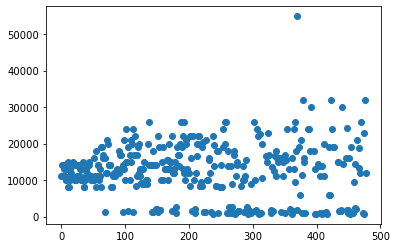

In [19]:
plt.scatter(df.index,df['actualprice'])
plt.show()

I have ploted the lineplot for actualprice on y-axis and index on x-axis 

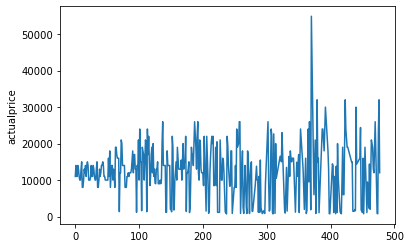

In [20]:
fig = sns.lineplot(x=df.index,y=df['actualprice'])


This is a sctterplot ratings on x-axis and actualprice on y-axis

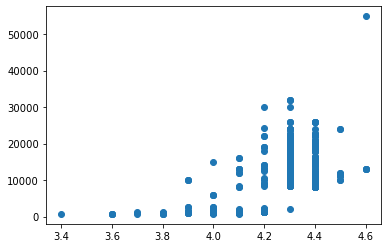

In [21]:
plt.scatter(x='ratings',y='actualprice',data = df)

It is the hist plot for price 

<AxesSubplot:ylabel='Frequency'>

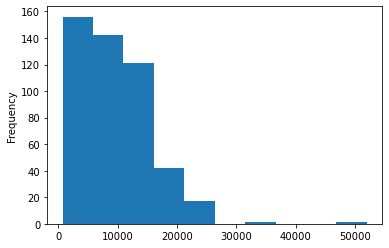

In [22]:
df['price'].plot(kind = 'hist')

It is hist plot for ratings

<AxesSubplot:ylabel='Frequency'>

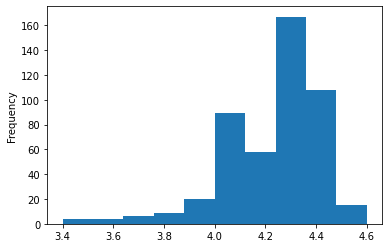

In [23]:
df['ratings'].plot(kind='hist')

It is a host plot for actualprice

<AxesSubplot:ylabel='Frequency'>

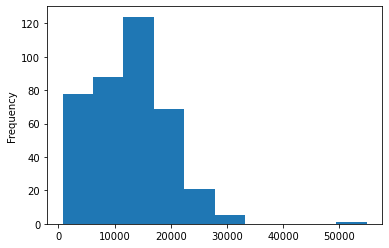

In [24]:
df['actualprice'].plot(kind='hist')

It is a hist plot for discount

<AxesSubplot:ylabel='Frequency'>

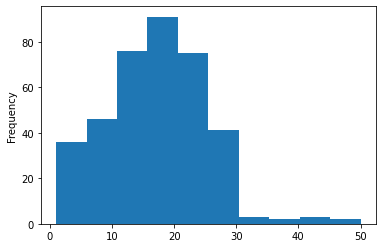

In [25]:
df['discount'].plot(kind='hist')

We have plotted a displot for price in Blue color

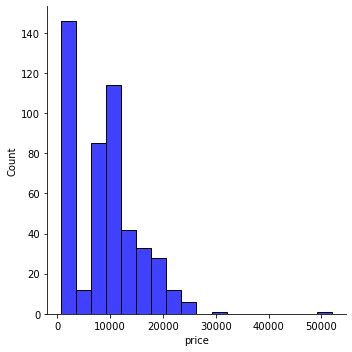

In [26]:
sns.displot(df['price'],color = 'Blue')

It is a countplot of figsize (12,10) and RAM on x-axis 

<AxesSubplot:xlabel='RAM', ylabel='count'>

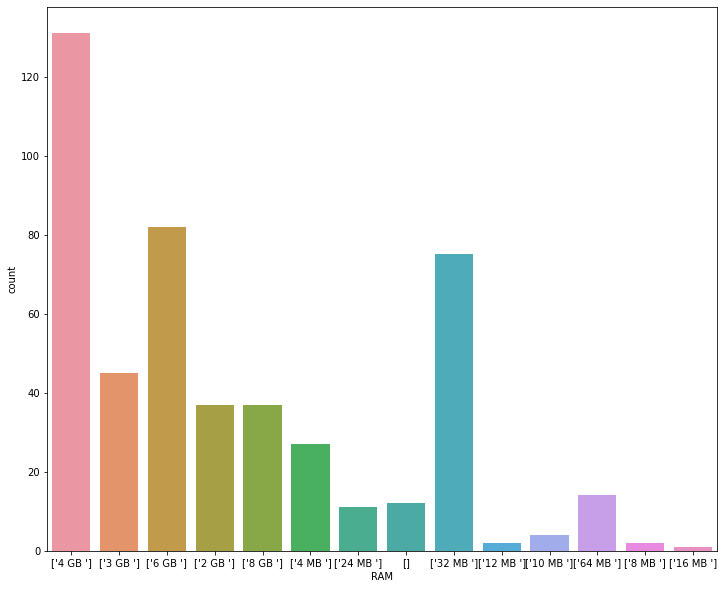

In [27]:
plt.figure(figsize=(12,10))
sns.countplot( x ="RAM",data=df)

It is a histplot 
Here we used groupby() function which is used to split data in to groups.

<AxesSubplot:ylabel='Frequency'>

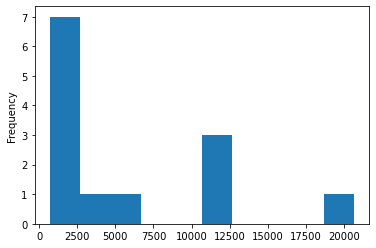

In [28]:
df.groupby('ratings').mean()['price'].plot(kind='hist')

it is plotted for mean of price and actualprice and here we used groupby function

<AxesSubplot:ylabel='Frequency'>

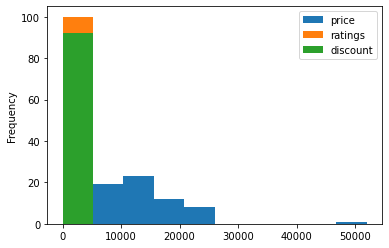

In [29]:
df.groupby('actualprice').mean("price").plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

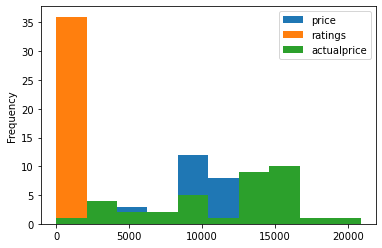

In [30]:
df.groupby('discount').mean("price").plot(kind="hist")

We plotted a histplot for groupby of discount and min of ratings 

<AxesSubplot:ylabel='Frequency'>

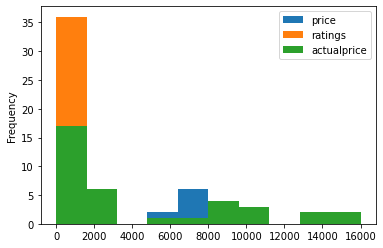

In [31]:
df.groupby('discount').min("ratings").plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

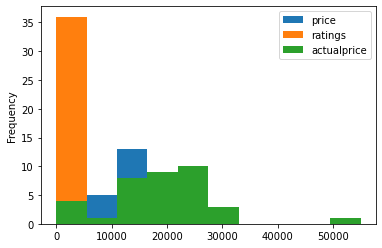

In [32]:
df.groupby('discount').max("ratings").plot(kind="hist")

Here we plotted a countplot of figsize(12,10) and price on x- axis

<AxesSubplot:xlabel='price', ylabel='count'>

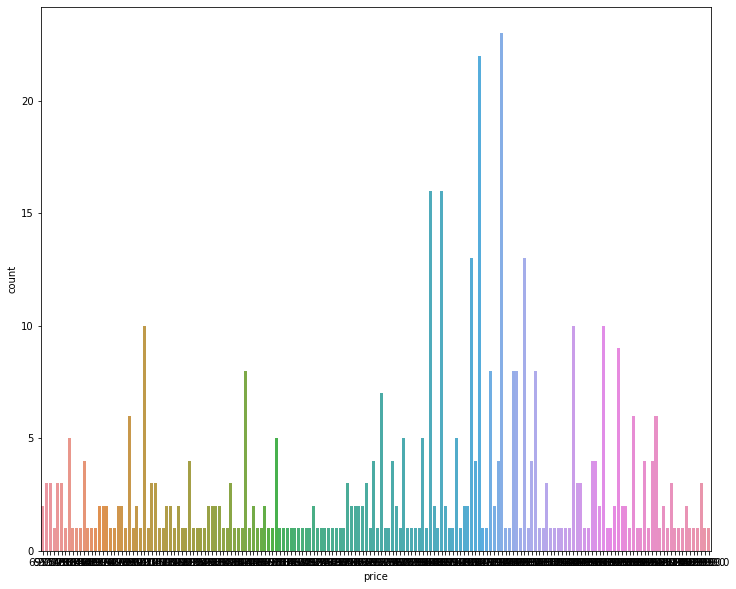

In [33]:
plt.figure(figsize=(12,10))
sns.countplot( x ="price",data=df)

It is distplot of color green and price on x-axis 

C:\Users\NAGA SAI SAMYUKTHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

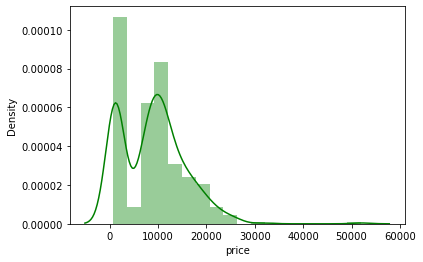

In [34]:
sns.distplot(df['price'], color='Green')

It is distplot of color blue and discount on x-axis 

C:\Users\NAGA SAI SAMYUKTHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='discount', ylabel='Density'>

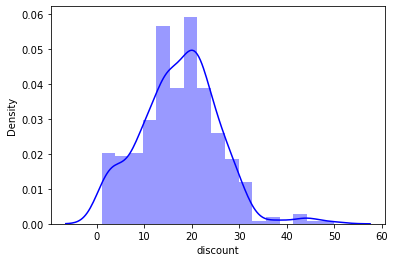

In [35]:
sns.distplot(df['discount'], color='Blue')

It is distplot of color black and actualprice on x-axis 

C:\Users\NAGA SAI SAMYUKTHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actualprice', ylabel='Density'>

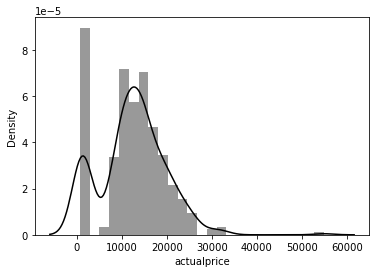

In [36]:
sns.distplot(df['actualprice'], color='Black')

Here we have a boxplot of figsize(10,10) and RAM on x-axis and price on Y-axis 

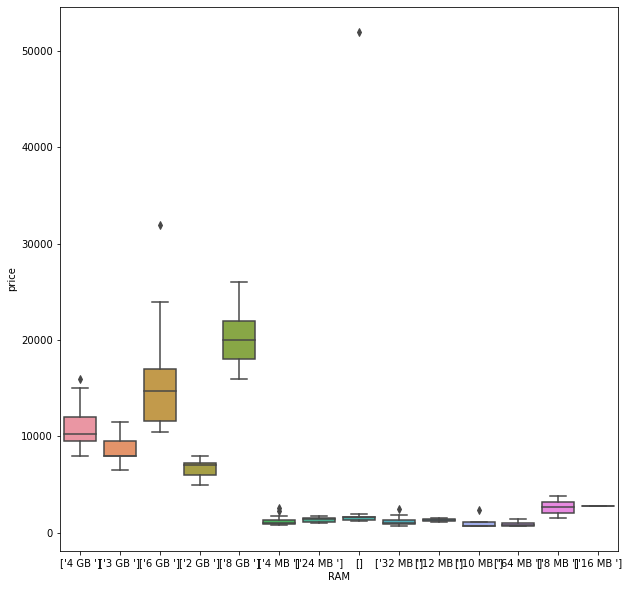

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x='RAM',y='price',data=df)
plt.show()


Here we have a barplot of figsize(10,8) with mean of price and groupby of RAM 

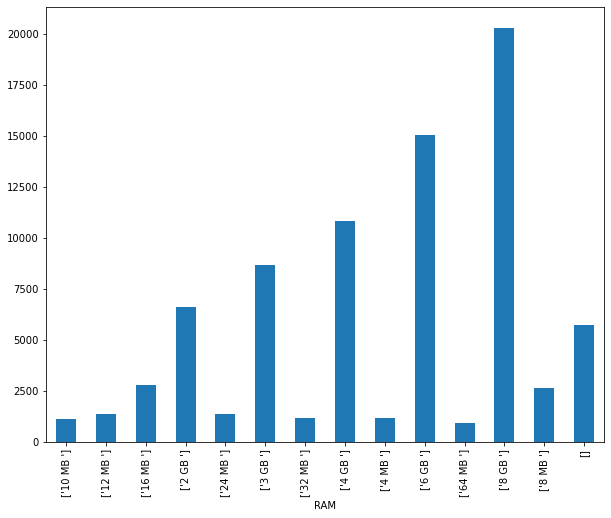

In [38]:
plt.figure(figsize=(10,8))
df.groupby('RAM').mean()['price'].plot(kind='bar')
plt.show()


Here we have a barplot of figsize(10,8) with mean of price and groupby of productname 

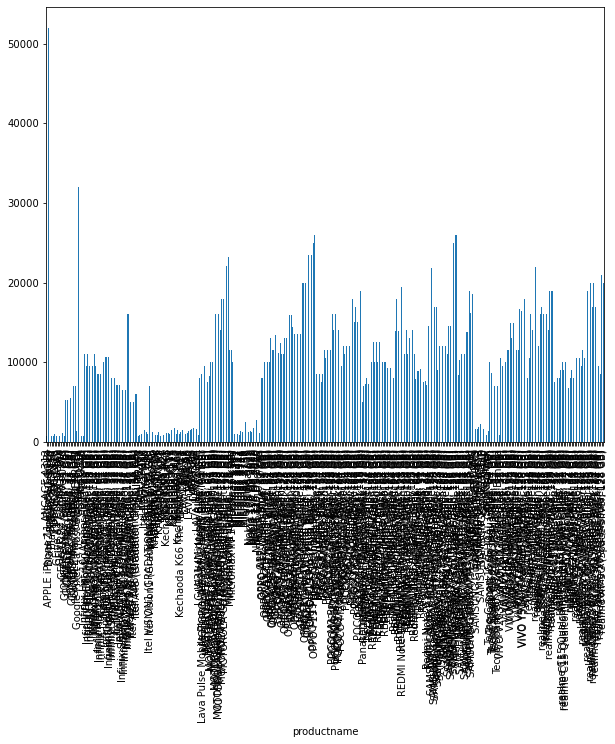

In [39]:
plt.figure(figsize=(10,8))
df.groupby('productname').mean()['price'].plot(kind='bar')
plt.show()


Here we have a barplot of figsize(10,8) with mean of price and groupby of discount  

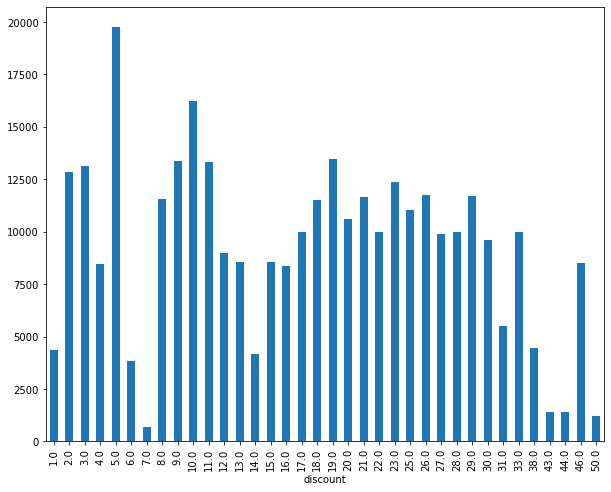

In [40]:
plt.figure(figsize=(10,8))
df.groupby('discount').mean()['price'].plot(kind='bar')
plt.show()


I have plotted a countplot of figsize(12,10) and ratings on x-axis 

<AxesSubplot:xlabel='ratings', ylabel='count'>

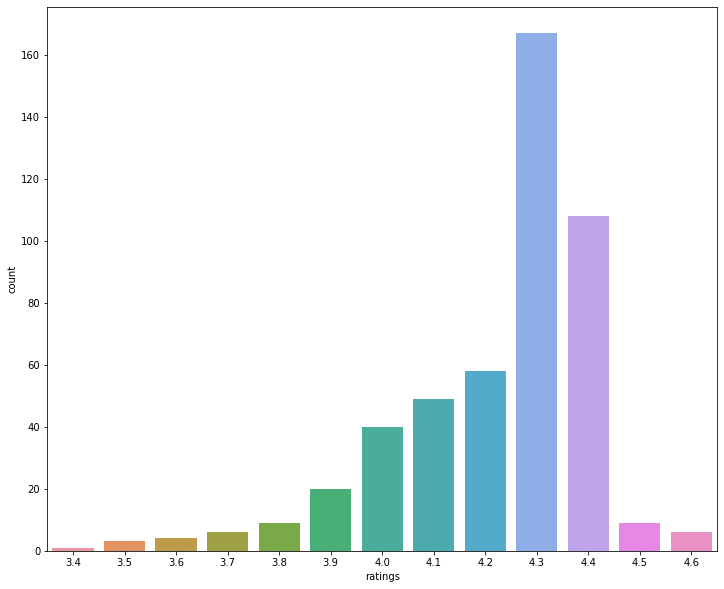

In [41]:
plt.figure(figsize=(12,10))
sns.countplot( x ="ratings",data=df)

here we have plotted countplot that discount on x-axis 

<AxesSubplot:xlabel='discount', ylabel='count'>

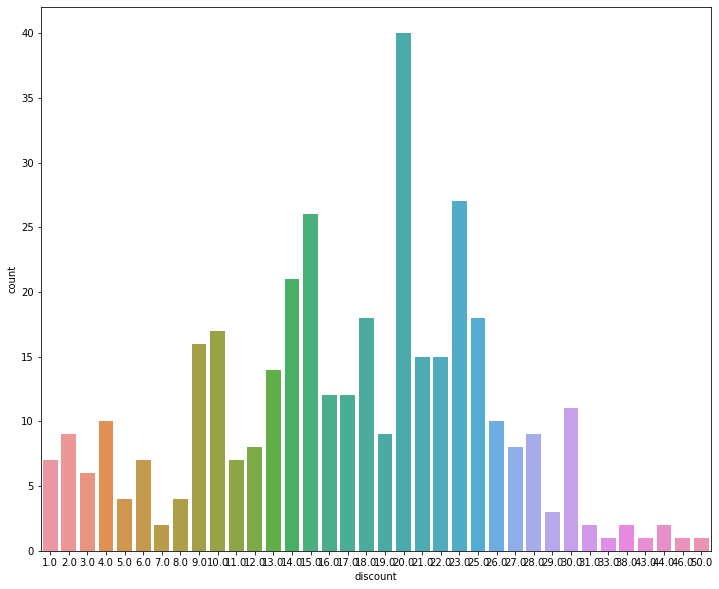

In [42]:
plt.figure(figsize=(12,10))
sns.countplot( x ="discount",data=df)

I have plotted a countplot of figsize(12,10) and actualprice on x-axis 

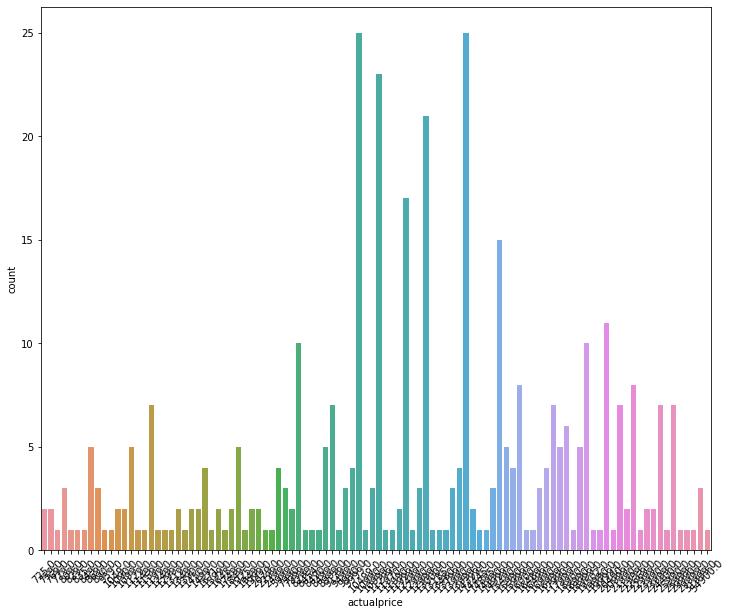

In [43]:
plt.figure(figsize=(12,10))
sns.countplot( x ="actualprice",data=df)
plt.xticks(rotation=45)
plt.show()


I have plotted a boxplot of figsize(12,10) and RAM on x-axis and price on y-axis 

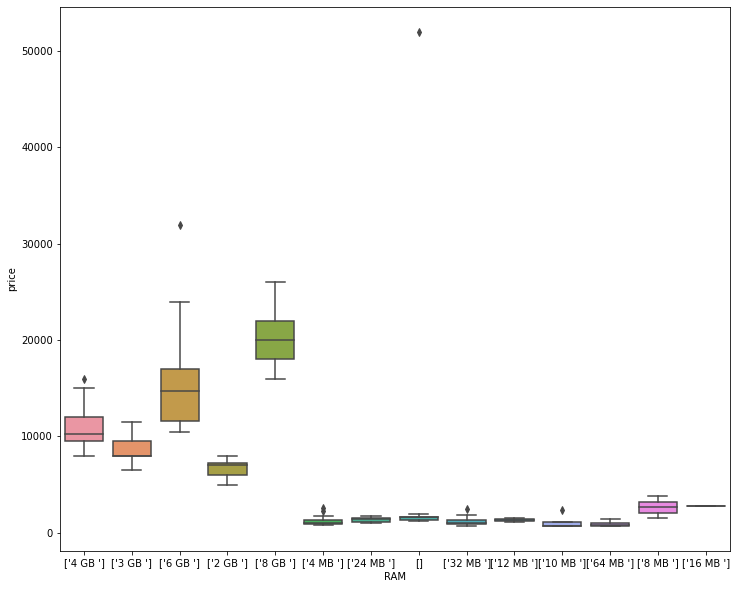

In [44]:
plt.figure(figsize=(12,10))
sns.boxplot(x='RAM',y='price',data=df)
plt.show()


Here I have plotted a scatterplot that price on x-axis and ratings on y-axis and we have used a property color called hue and in this graph we have taken that hue for actualprice 

<AxesSubplot:xlabel='price', ylabel='ratings'>

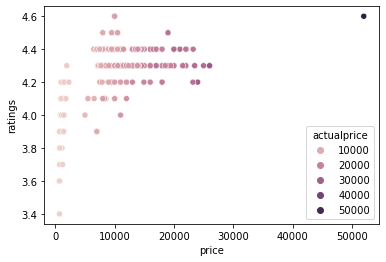

In [45]:
sns.scatterplot(x=df['price'],y=df['ratings'],hue=df['actualprice'])


Here I have plotted a scatterplot that price on x-axis and ratings on y-axis and we have used a property color called hue and in this graph we have taken that hue for price

<AxesSubplot:xlabel='price', ylabel='ratings'>

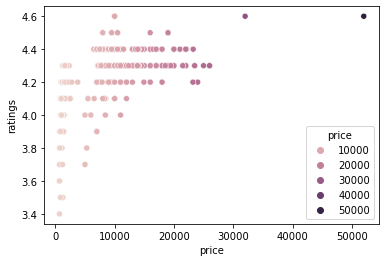

In [46]:
sns.scatterplot(x=df['price'],y=df['ratings'],hue=df['price'])


Here I have plotted a scatterplot that price on x-axis and ratings on y-axis and we have used a property color called hue and in this graph we have taken that hue for RAM 

<AxesSubplot:xlabel='price', ylabel='ratings'>

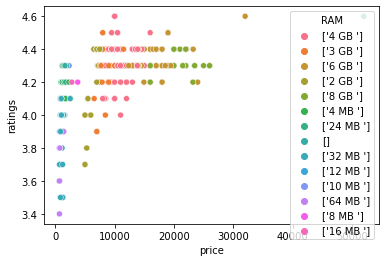

In [47]:
sns.scatterplot(x=df['price'],y=df['ratings'],hue=df['RAM'])


Here I have plotted a scatterplot that price on x-axis and actualprice on y-axis and we have used a property color called hue and in this graph we have taken that hue for RAM

<AxesSubplot:xlabel='price', ylabel='actualprice'>

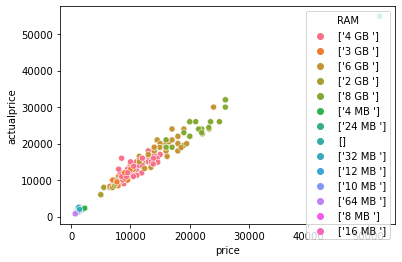

In [48]:
sns.scatterplot(x=df['price'],y=df['actualprice'],hue=df['RAM'])


Here I have plotted a scatterplot that price on x-axis and actualprice on y-axis and we have used a property color called hue and in this graph we have taken that hue for ROM  

<AxesSubplot:xlabel='price', ylabel='actualprice'>

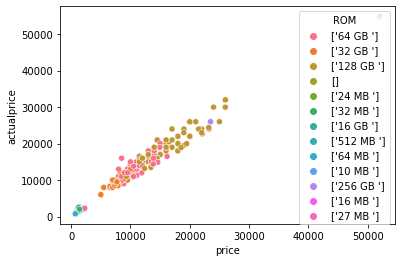

In [49]:
sns.scatterplot(x=df['price'],y=df['actualprice'],hue=df['ROM'])


Here I have plotted a scatterplot that price on x-axis and actualprice on y-axis and we have used a property color called hue and in this graph we have taken that hue for Battery

<AxesSubplot:xlabel='price', ylabel='actualprice'>

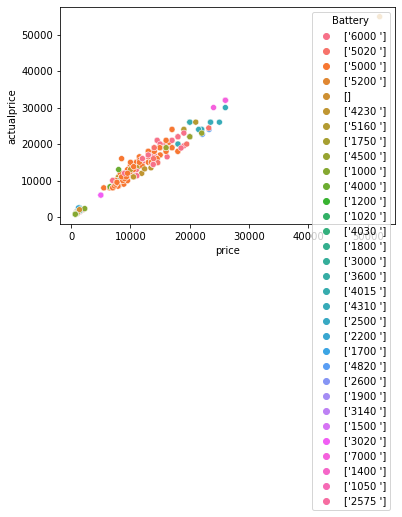

In [50]:
sns.scatterplot(x=df['price'],y=df['actualprice'],hue=df['Battery'])


Here I have plotted a scatterplotof figsize(12,10) that RAM on x-axis and price on y-axis and we have used a property color called hue and in this graph we have taken that hue for ratings 

<AxesSubplot:xlabel='RAM', ylabel='price'>

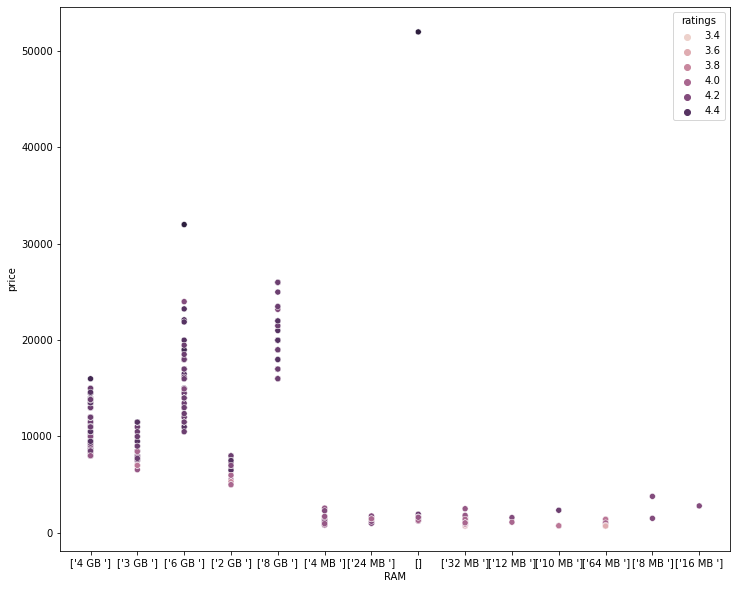

In [51]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['RAM'],y=df['price'], hue=df['ratings'])


Here I have plotted a scatterplotof figsize(12,10) that productname on x-axis and Batery on y-axis and we have used a property color called hue and in this graph we have taken that hue for price 

<AxesSubplot:xlabel='productname', ylabel='Battery'>

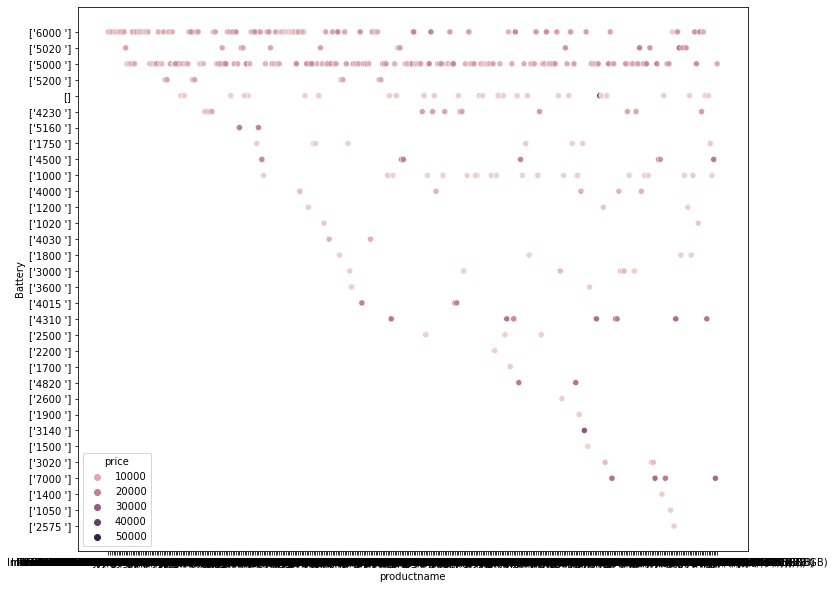

In [52]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['productname'],y=df['Battery'], hue=df['price'])


Here I have plotted a scatterplotof figsize(10,10) that RAM on x-axis and price on y-axis and we have used a property color called hue and in this graph we have taken that hue for price 

<AxesSubplot:xlabel='RAM', ylabel='price'>

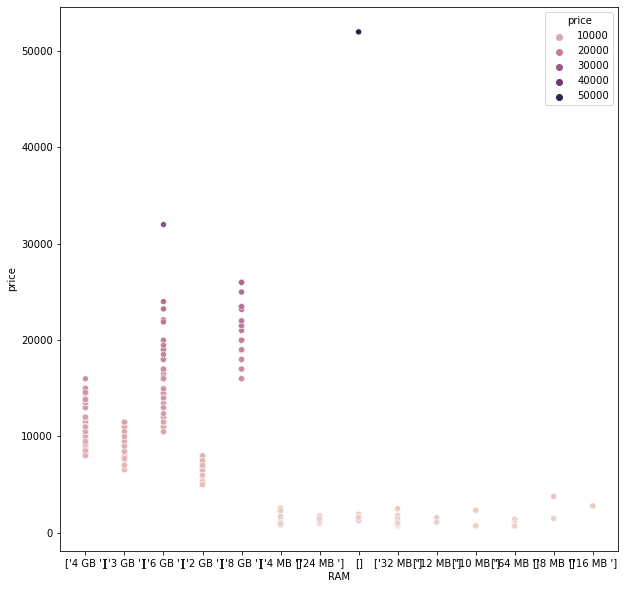

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['RAM'],y=df['price'], hue=df['price'])


Here i have plotted a barplot of using groupby func of ROM  and mean of price 

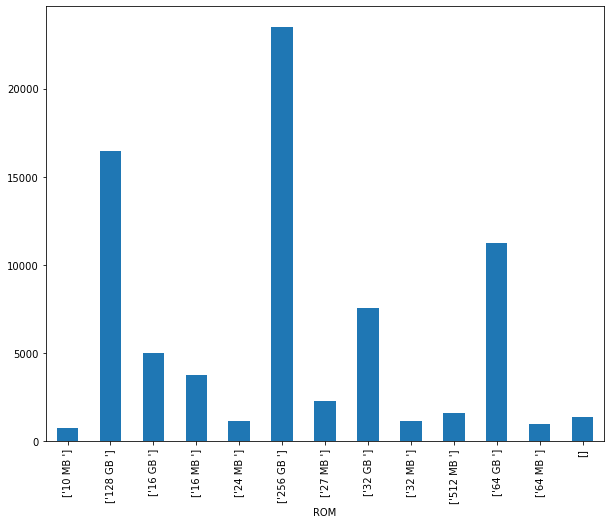

In [54]:
plt.figure(figsize=(10,8))
df.groupby('ROM').mean()['price'].plot(kind='bar')
plt.show()


Here i have plotted a barplot of using groupby func of Battery  and mean of price 

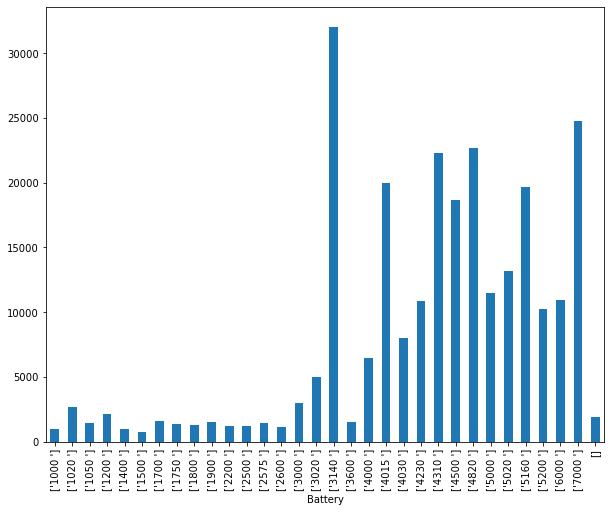

In [55]:
plt.figure(figsize=(10,8))
df.groupby('Battery').mean()['price'].plot(kind='bar')
plt.show()


Here i have plotted a histplot of using groupby func of RAM  and mean of actualprice 

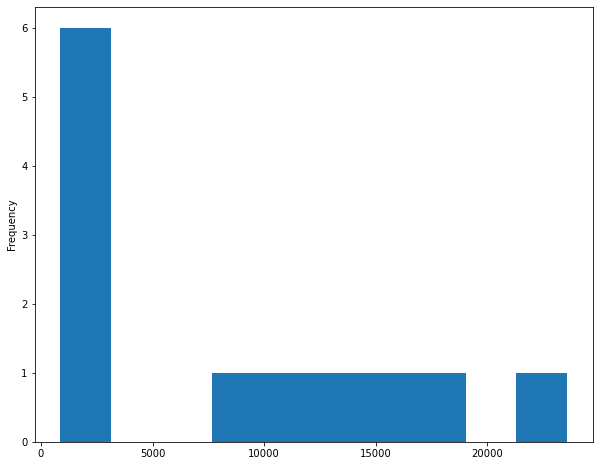

In [56]:
plt.figure(figsize=(10,8))
df.groupby('RAM').mean()['actualprice'].plot(kind='hist')
plt.show()


Here i have plotted a barplot of using groupby func of RAM  and mean of discount 

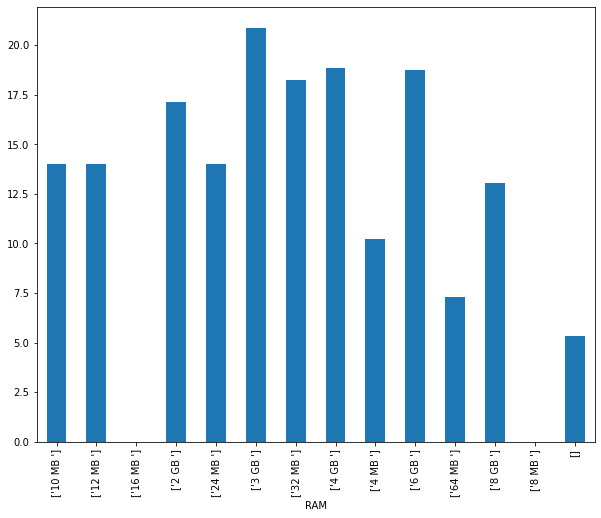

In [57]:
plt.figure(figsize=(10,8))
df.groupby('RAM').mean()['discount'].plot(kind='bar')
plt.show()


Here i have plotted a barplot of using groupby func of Battery  and std of price 

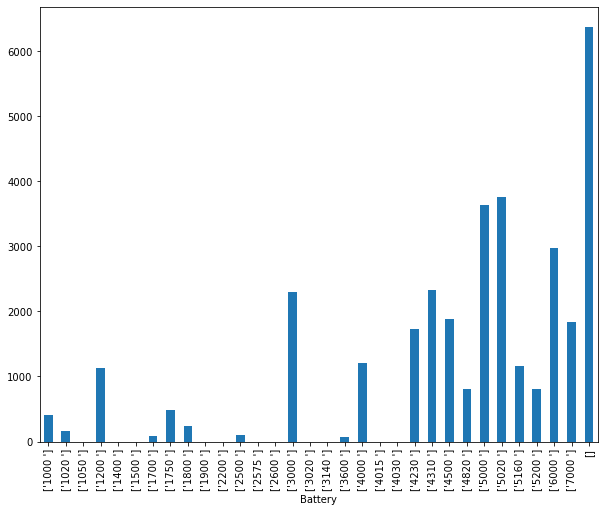

In [58]:
plt.figure(figsize=(10,8))
df.groupby('Battery').std()['price'].plot(kind='bar')
plt.show()


I have plotted boxplot of RAM on x-axis and actualprice on y -axis 

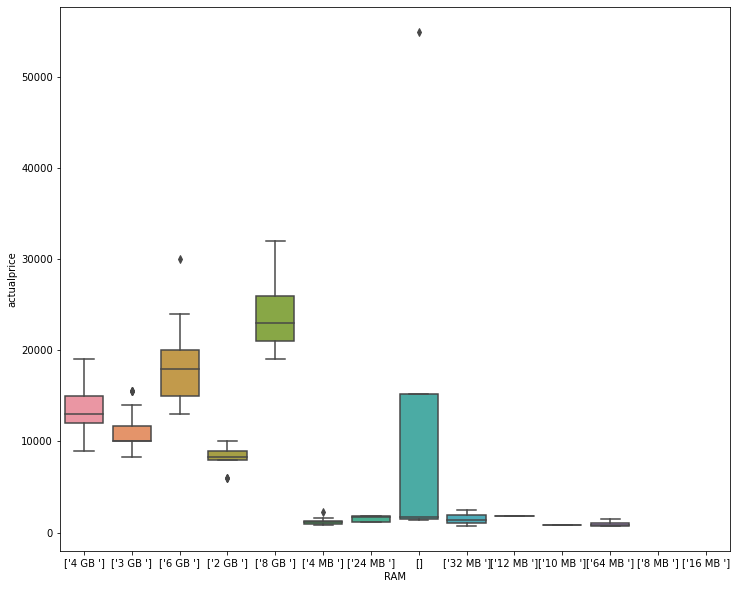

In [59]:
plt.figure(figsize=(12,10))
sns.boxplot(x='RAM',y = "actualprice", data=df)
plt.show()


I have plotted boxplot of ROM on x-axis and actualprice on y -axis 

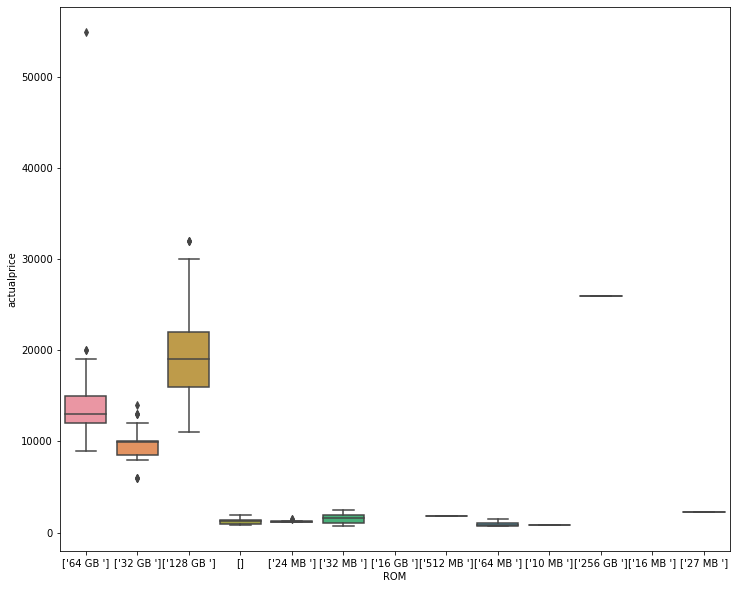

In [60]:
plt.figure(figsize=(12,10))
sns.boxplot(x='ROM',y = "actualprice", data=df)
plt.show()


I have plotted boxplot of Battery on x-axis and discount on y -axis 

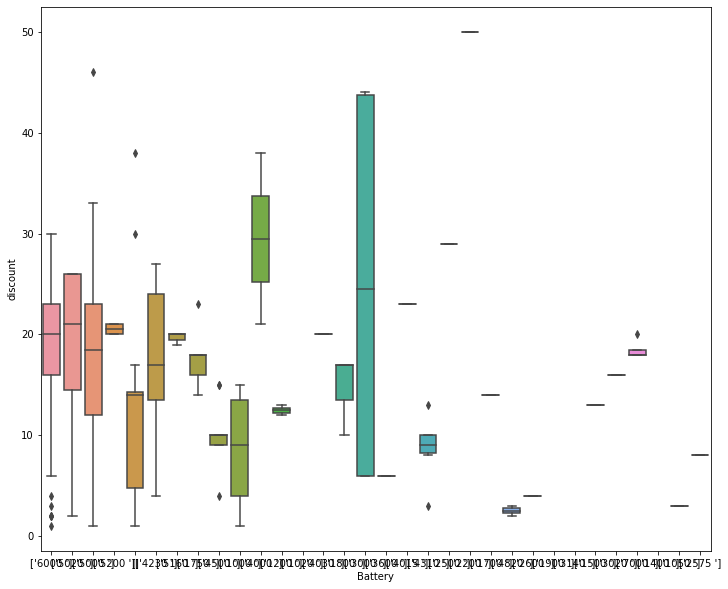

In [61]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Battery',y = "discount", data=df)
plt.show()


I have plotted barplot of RAM on x-axis and price on y -axis 

<AxesSubplot:xlabel='RAM', ylabel='price'>

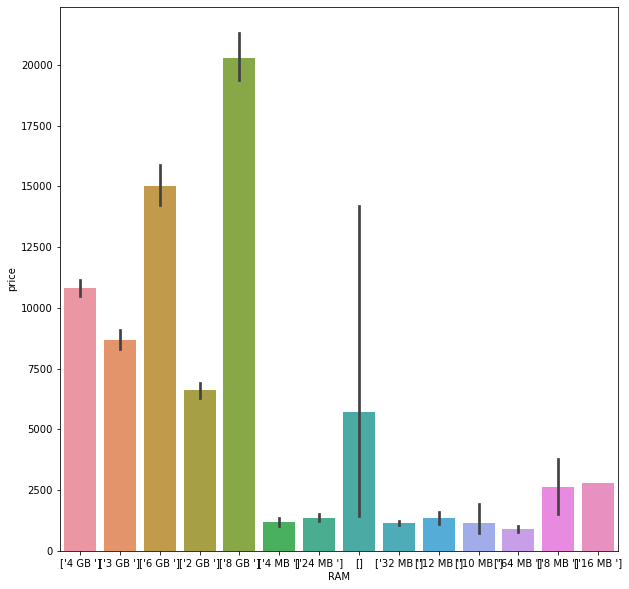

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(x = "RAM",y = "price", data = df)



I have taken scatterplot for prices lessthan 30000 and that price on x-axis and ratings on y axis 

<AxesSubplot:xlabel='price', ylabel='ratings'>

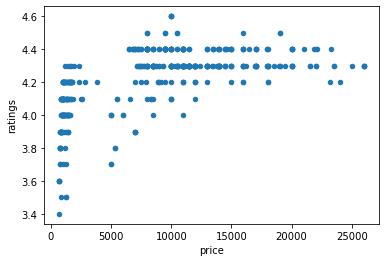

In [63]:
df[df["price"]<30000].plot(x="price",y="ratings",kind="scatter")

I have taken violinplot of figsize(15,12) and actualprice on x-axis and price on y-axis 

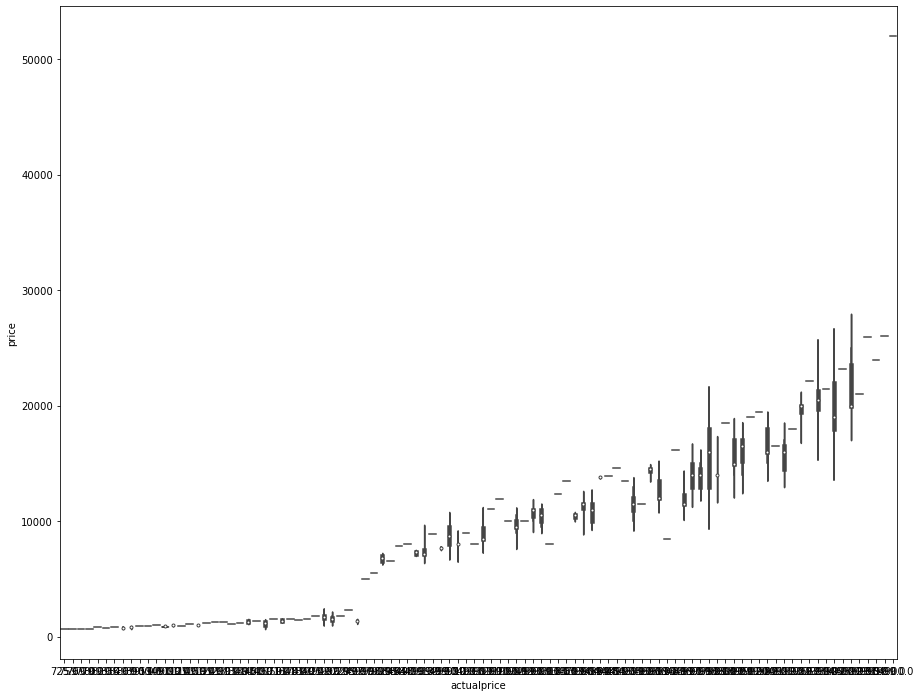

In [64]:
plt.figure(figsize=(15,12))
sns.violinplot(x='actualprice', y='price',data = df)
plt.show()


I have taken a violinplot of figsize(12,10) and that RAM on x-axis and discount on y-axis 

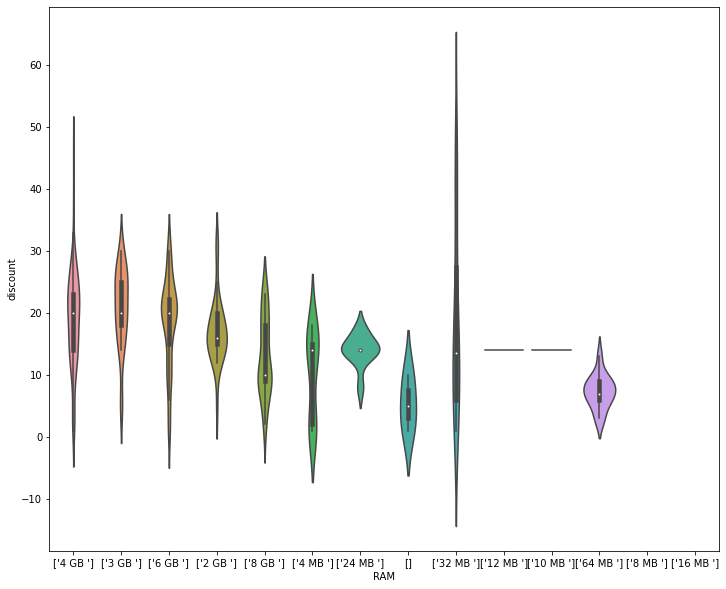

In [65]:
plt.figure(figsize=(12,10))
sns.violinplot(x='RAM', y='discount',data = df)
plt.show()


I have plotted a violinplot of productname on x-axis and price on y-axis and that having figsize(15,12)

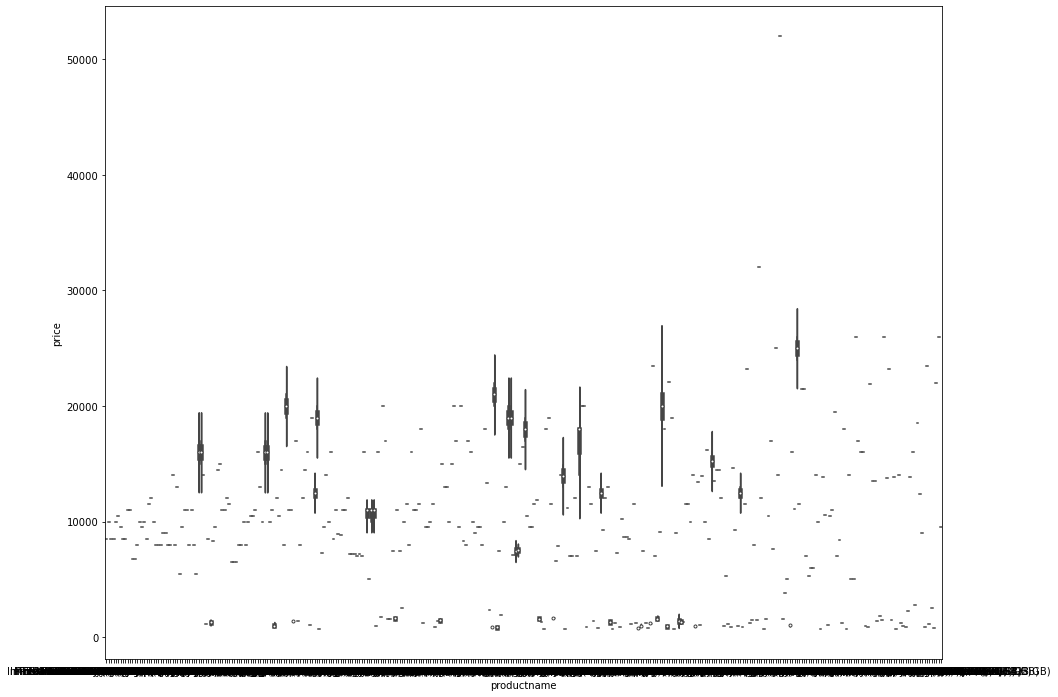

In [66]:
plt.figure(figsize=(15,12))
sns.violinplot(x='productname', y='price',data = df)
plt.show()


I have plotted a violinplot of RAM on x-axis and actualprice on y-axis and that having figsize(10,10)

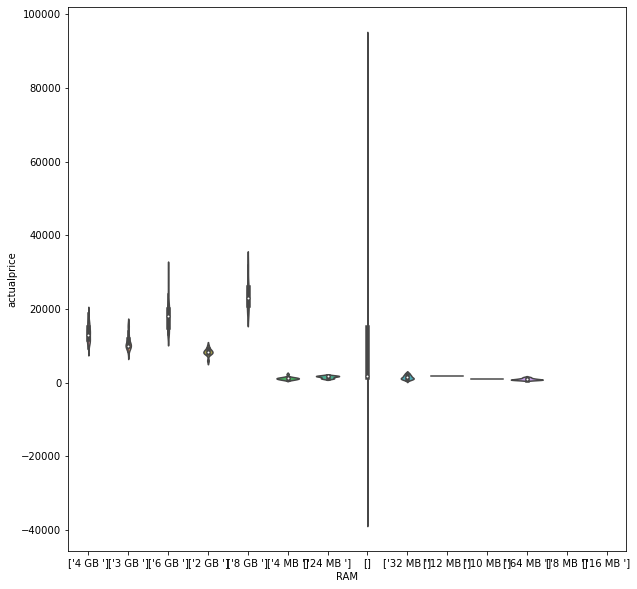

In [67]:
plt.figure(figsize=(10,10))
sns.violinplot(x='RAM', y='actualprice',data = df)
plt.show()


I have plotted a violinplot of ROM on x-axis and discount on y-axis and that having figsize(15,12)

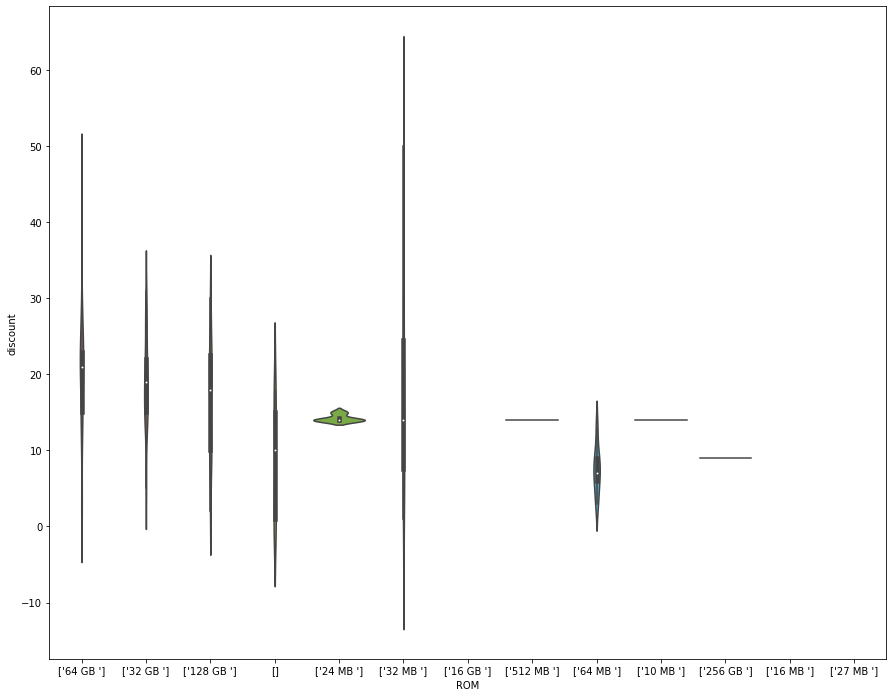

In [68]:
plt.figure(figsize=(15,12))
sns.violinplot(x='ROM', y='discount',data = df)
plt.show()


Here I have taken a countplot of ROM on x-axis and figsize(12,10)

<AxesSubplot:xlabel='ROM', ylabel='count'>

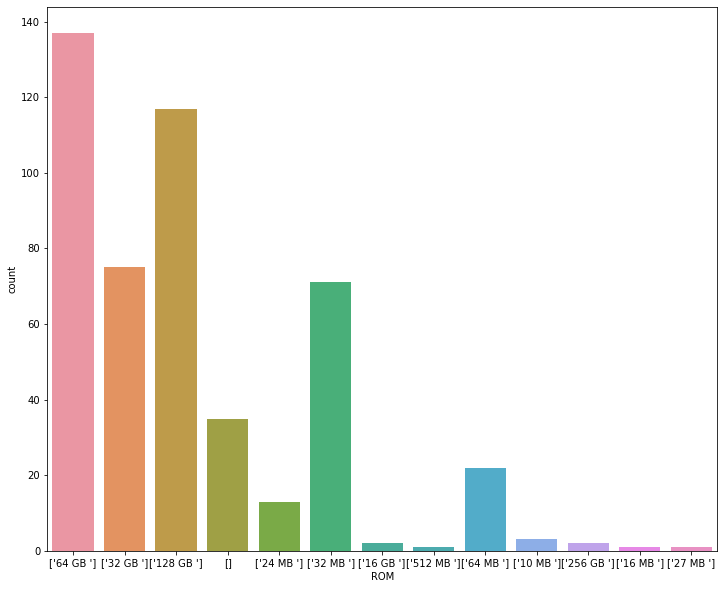

In [69]:
plt.figure(figsize=(12,10))
sns.countplot( x ="ROM",data=df)

Here I have taken a countplot of Battery on x-axis and figsize(12,10)

<AxesSubplot:xlabel='Battery', ylabel='count'>

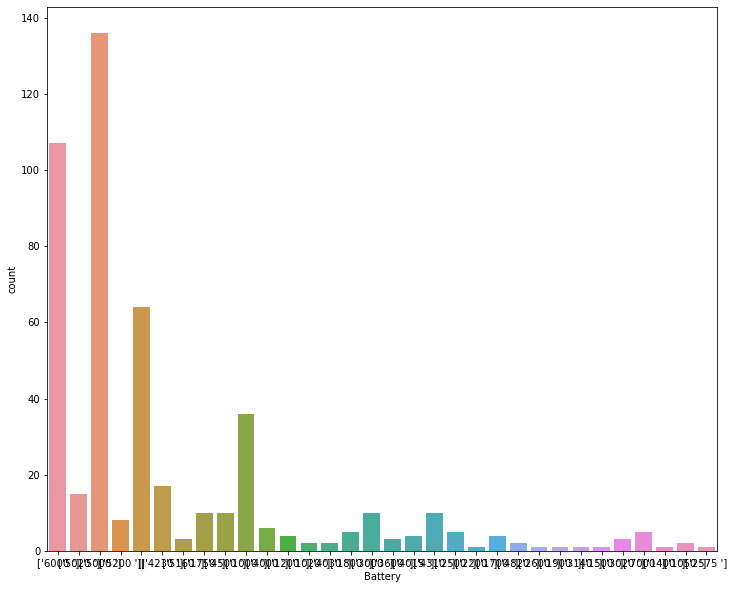

In [70]:
plt.figure(figsize=(12,10))
sns.countplot( x ="Battery",data=df)

Here I have taken a countplot of discount on x-axis and figsize(12,10)

<AxesSubplot:xlabel='discount', ylabel='count'>

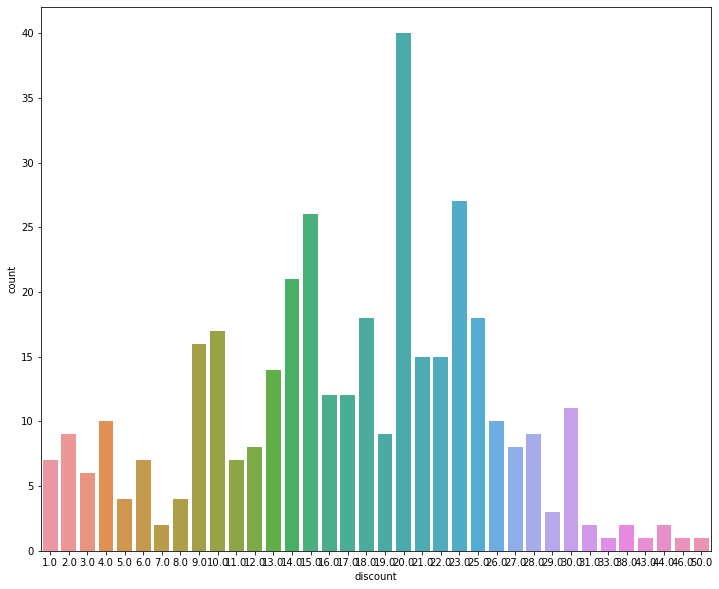

In [71]:
plt.figure(figsize=(12,10))
sns.countplot( x ="discount",data=df)


# lmplot -
  It shows a line on a 2 dimensional plane 

Here I have taken a lmplot of price on x-axis and actualprice on y-axis and hue of ratings 

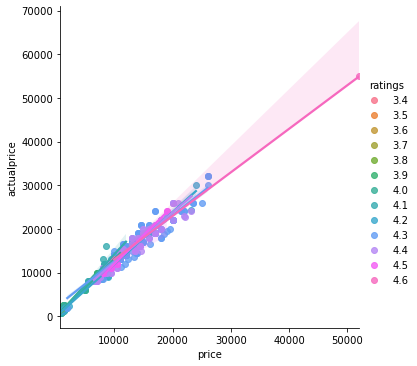

In [72]:
sns.lmplot(x='price', y='actualprice', data=df, fit_reg=True, hue='ratings')

# Heatmap -
 It is a representation of of data where the individual values that are contained in a matrix are represented in colors 


I have taken a heatmap for df.describe in green 

<AxesSubplot:>

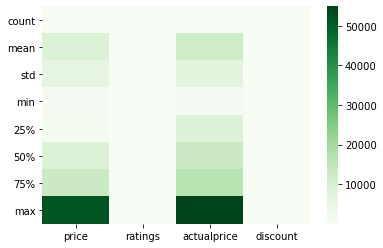

In [73]:
sns.heatmap(df.describe(),cmap='Greens',annot=True)

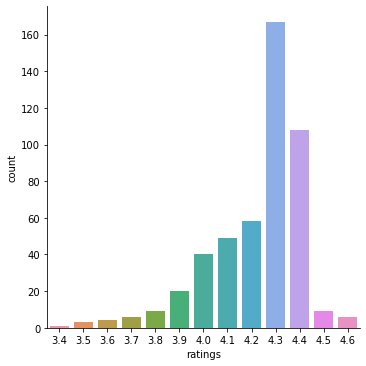

In [74]:
sns.catplot(x='ratings', data=df, kind='count')

# bin means the range of values that divides the entire range of values into series of intervals and then count how many values fall into each interval 

<AxesSubplot:>

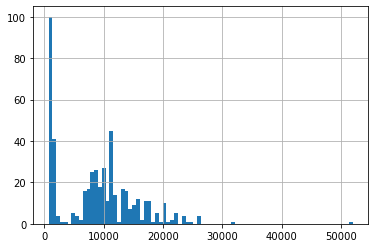

In [75]:
df['price'].hist(bins=80)

<AxesSubplot:>

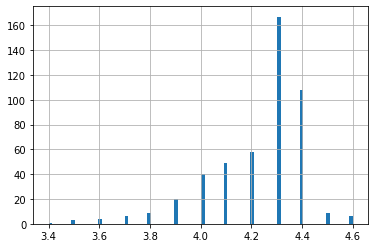

In [76]:
df['ratings'].hist(bins=80)

<AxesSubplot:>

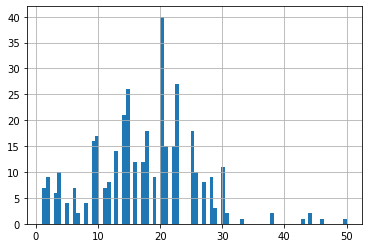

In [77]:
df['discount'].hist(bins=80)

<AxesSubplot:>

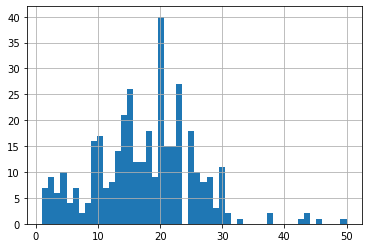

In [78]:
df['discount'].hist(bins=50)

 I have done all possibles analysis of my data (mobiles) and I explained each and every cell that what I have done above 